# Introduction

This notebook works through a series of experiments aimed at creating a convnet that can accurately distinguish between x-ray images of pediatric patients with and without pneumonia.

The dataset is a set of 5,856 x-ray images from patients 1-5 years old who received care at the Guangzhou Women and Children's Medical Center.  It was made available by Paul Mooney on kaggle.com: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia. 

# Getting the Data

After downloading the dataset (which is pre-shuffled into train, test, and validation directories), the directory names and image count is generated:

In [1]:
import os, fnmatch
from pathlib import Path

base_dir = 'C:\\Users\\Jonathan\\Dropbox\\Northwestern\\MSDS 458\\Final Project\\chest-xray-pneumonia\\chest_xray\\chest_xray'
# base_dir = 'C:\\Users\\jonathanm\\Dropbox\\Northwestern\\MSDS 458\\Final Project\\chest-xray-pneumonia\\chest_xray\\chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# directory names
normal_train_dir = os.path.join(train_dir, 'NORMAL')
pneumonia_train_dir = os.path.join(train_dir, 'PNEUMONIA')
normal_val_dir = os.path.join(val_dir, 'NORMAL')
pneumonia_val_dir = os.path.join(val_dir, 'PNEUMONIA')
normal_test_dir = os.path.join(test_dir, 'NORMAL')
pneumonia_test_dir = os.path.join(test_dir, 'PNEUMONIA')

# number of .jpeg files in each image category
normal_train_len = len(fnmatch.filter(os.listdir(normal_train_dir), '*.jpeg'))
pneumonia_train_len = len(fnmatch.filter(os.listdir(pneumonia_train_dir), '*.jpeg'))
normal_val_len = len(fnmatch.filter(os.listdir(normal_val_dir), '*.jpeg'))
pneumonia_val_len = len(fnmatch.filter(os.listdir(pneumonia_val_dir), '*.jpeg'))
normal_test_len = len(fnmatch.filter(os.listdir(normal_test_dir), '*.jpeg'))
pneumonia_test_len = len(fnmatch.filter(os.listdir(pneumonia_test_dir), '*.jpeg'))

print(normal_train_len, 'Normal training images found')
print(pneumonia_train_len, 'Pneumonoia training images found')
print(normal_val_len, 'Normal validation images found')
print(pneumonia_val_len, 'Pneumonia validation images found')
print(normal_test_len, 'Normal testing images found')
print(pneumonia_test_len, 'Pneumonia testing images found')

1341 Normal training images found
3875 Pneumonoia training images found
8 Normal validation images found
8 Pneumonia validation images found
234 Normal testing images found
390 Pneumonia testing images found


# Processing the Data

The train, validation, and test images are converted into 256 x 256 numpy arrays via a glob generator:

### Train Data

In [2]:
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
from sklearn.utils import shuffle

# get number of images for both categories
train_len = normal_train_len + pneumonia_train_len

# create generator for image files
normal_train_images = Path(normal_train_dir).glob('*.jpeg')
pneumonia_train_images = Path(pneumonia_train_dir).glob('*.jpeg')

# create blank arrays for containing data and labels
train_data = np.zeros((train_len, 256, 256, 1), dtype=np.float32)
train_labels = np.zeros((train_len, 1), dtype=np.int64)

# normal cases
for i, img in enumerate(normal_train_images):
    # read image and resize
    img = img_to_array(load_img(str(img),
                                target_size=(256, 256),
                                color_mode='grayscale')) / 255
    train_data[i] = img
    train_labels[i] = 0
    
# pneumonia cases
for i, img in enumerate(pneumonia_train_images):
    img = img_to_array(load_img(str(img),
                                target_size=(256, 256),
                                color_mode='grayscale')) / 255
    train_data[i + normal_train_len] = img
    train_labels[i + normal_train_len] = 1
    
# shuffle data
train_data, train_labels = shuffle(train_data, train_labels, random_state=14)

Using TensorFlow backend.


In [3]:
train_data.shape

(5216, 256, 256, 1)

In [4]:
train_labels.shape

(5216, 1)

### Validation Data

In [5]:
# get number of images
val_len = normal_val_len + pneumonia_val_len

# create generators
normal_val_images = Path(normal_val_dir).glob('*.jpeg')
pneumonia_val_images = Path(pneumonia_val_dir).glob('*.jpeg')

# create blank arrays
val_data = np.zeros((val_len, 256, 256, 1), dtype=np.float32)
val_labels = np.zeros((val_len, 1), dtype=np.int64)

# normal cases
for i, img in enumerate(normal_val_images):
    img = img_to_array(load_img(str(img),
                                target_size=(256, 256),
                                color_mode='grayscale')) / 255
    val_data[i] = img
    val_labels[i] = 0
    
# pneumonia cases
for i, img in enumerate(pneumonia_val_images):
    img = img_to_array(load_img(str(img),
                                target_size=(256, 256),
                                color_mode='grayscale')) / 255
    val_data[i + normal_val_len] = img
    val_labels[i + normal_val_len] = 1

In [6]:
val_data.shape

(16, 256, 256, 1)

In [7]:
val_labels.shape

(16, 1)

### Test Data

In [8]:
# get number of images
test_len = normal_test_len + pneumonia_test_len

# crete generators
normal_test_images = Path(normal_test_dir).glob('*.jpeg')
pneumonia_test_images = Path(pneumonia_test_dir).glob('*.jpeg')

# create blank arrays
test_data = np.zeros((test_len, 256, 256, 1), dtype=np.float32)
test_labels = np.zeros((test_len, 1), dtype=np.int64)

# normal cases
for i, img in enumerate(normal_test_images):
    img = img_to_array(load_img(str(img),
                                target_size=(256, 256),
                                color_mode='grayscale')) / 255
    test_data[i] = img
    test_labels[i] = 0

# pneumonia cases
for i, img in enumerate(pneumonia_test_images):
    img = img_to_array(load_img(str(img),
                                target_size=(256, 256),
                                color_mode='grayscale')) / 255
    test_data[i + normal_test_len] = img
    test_labels[i + normal_test_len] = 1

In [9]:
test_data.shape

(624, 256, 256, 1)

In [10]:
test_labels.shape

(624, 1)

# Explore the Data

### Class Distributions

In [11]:
import matplotlib.pyplot as plt

1341 Normal training examples
3875 Pneumonia training examples


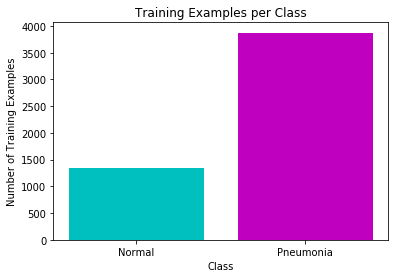

In [12]:
print(normal_train_len, 'Normal training examples')
print(pneumonia_train_len, 'Pneumonia training examples')

plt.bar(np.arange(2), [normal_train_len, pneumonia_train_len], color=['c', 'm'])
plt.xlabel('Class')
plt.ylabel('Number of Training Examples')
plt.xticks(np.arange(2), ['Normal', 'Pneumonia'])
plt.title('Training Examples per Class')
plt.show()

8 Normal validation examples
8 Pneumonia validation examples


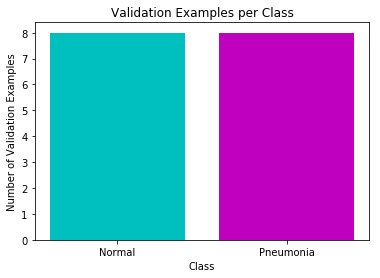

In [13]:
print(normal_val_len, 'Normal validation examples')
print(pneumonia_val_len, 'Pneumonia validation examples')

plt.bar(np.arange(2), [normal_val_len, pneumonia_val_len], color=['c', 'm'])
plt.xlabel('Class')
plt.ylabel('Number of Validation Examples')
plt.xticks(np.arange(2), ['Normal', 'Pneumonia'])
plt.title('Validation Examples per Class')
plt.show()

234 Normal test examples
390 Pneumonia test examples


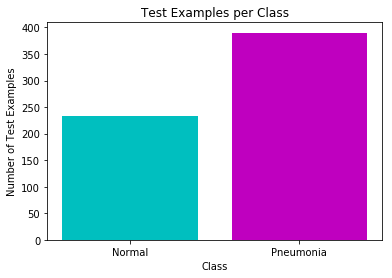

In [14]:
print(normal_test_len, 'Normal test examples')
print(pneumonia_test_len, 'Pneumonia test examples')
plt.bar(np.arange(2), [normal_test_len, pneumonia_test_len], color=['c', 'm'])
plt.xlabel('Class')
plt.ylabel('Number of Test Examples')
plt.xticks(np.arange(2), ['Normal', 'Pneumonia'])
plt.title('Test Examples per Class')
plt.show()

Notes:
- These plots demonstrate the clear class imbalance present in the data.  Quite a few more examples of pneumonia than non-pneumonia patients in both the training and test sets

### Image Examples

Normal Images:

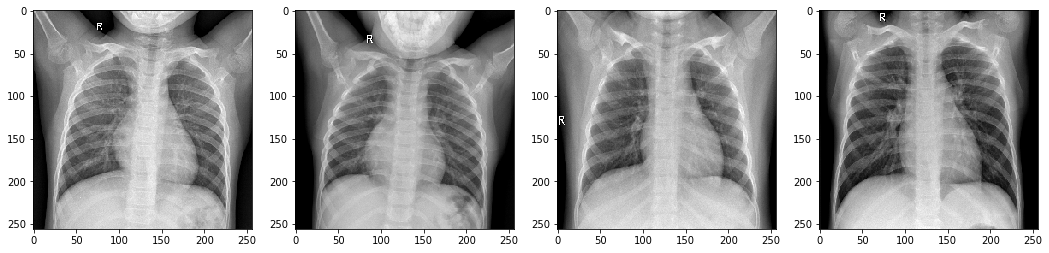

In [15]:
fig = plt.figure(figsize=(18, 16))

img_count = 0
for i, label in enumerate(train_labels):
    if label == 0:
        ax = fig.add_subplot(1, 4, img_count + 1)
        ax.imshow(train_data[i].squeeze(), cmap='gray')
        img_count += 1
    if img_count > 3:
        break

Pneumonia Images:

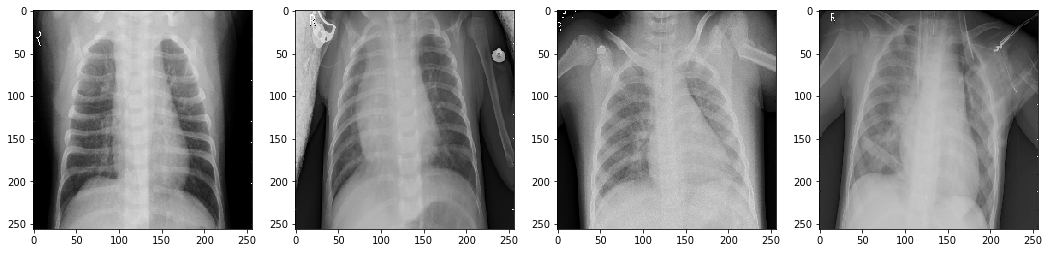

In [16]:
fig = plt.figure(figsize=(18, 16))

img_count = 0
for i, label in enumerate(train_labels):
    if label == 1:
        ax = fig.add_subplot(1, 4, img_count + 1)
        ax.imshow(train_data[i].squeeze(), cmap='gray')
        img_count += 1
    if img_count > 3:
        break

Notes:
- The structure of the images between the two classes are very similar.  All images represent a torso x-ray, with similar rotations, colors, and body structure.
- The difference with the pneumonia images seems to be a clouding in the lungs, which you can see in-between the bones of the ribcage.  A good network will likely need to look for this specifically.

# Basic Model

The first model will include a basic architecture that was refined over many experiments with the data.  It includes the following layers:
1. Convolutional
2. Pooling
3. Convolutional
4. Pooling
5. Flatten
6. Dropout
7. Dense
8. Dense

Because the dataset is unbalanced, the model will be evaulated via accuracy, precision, and recall.  Advanced preprocessing and training methods will be employed in later models.

### Train Model

In [17]:
from keras import backend as K
from keras import models
from keras import layers
from keras import callbacks
from keras import optimizers

K.clear_session()

# model structure
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), 
                        activation='relu', 
                        input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# custom metrics
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
# compile model
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = callbacks.ModelCheckpoint(filepath='basic_model.h5',
                                       monitor='val_loss',
                                       save_best_only=True)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc', precision_m, recall_m])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 4)       40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 4)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 4)       148       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dropout_1 (Dropout)  

In [18]:
# fitting the model
batch_size = 16
epochs = 50

history = model.fit(train_data, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[early_stop, checkpoint],
                    validation_data=(val_data, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 5216 samples, validate on 16 samples
Epoch 1/50
5216/5216 [==============================] - 8s 2ms/step - loss: 0.5967 - acc: 0.7416 - precision_m: 0.7432 - recall_m: 0.9973 - val_loss: 0.8319 - val_acc: 0.5000 - val_precision_m: 0.5000 - val_recall_m: 1.0000
Epoch 2/50
5216/5216 [==============================] - 5s 935us/step - loss: 0.5550 - acc: 0.7429 - precision_m: 0.7429 - recall_m: 1.0000 - val_loss: 0.8062 - val_acc: 0.5000 - val_precision_m: 0.5000 - val_recall_m: 1.0000
Epoch 3/50
5216/5216 [==============================] - 5s 903us/step - loss: 0.5127 - acc: 0.7429 - precision_m: 0.7429 - recall_m: 1.0000 - val_loss: 0.7360 - val_acc: 0.5000 - val_precision_m: 0.5000 - val_recall_m: 1.0000
Epoch 4/50
5216/5216 [==============================] - 5s 951us/step - loss: 0.4343 - acc: 0.7429 - precision_m: 0.7429 - recall_m: 1.0000 - val_loss: 0.6780 - val_acc: 0.5000 - val_precision_m: 0.5000 - val_recall_m: 1.0000
Epoc

### Evaluate Model

Training plots (accuracy, loss, precision, and recall):

In [ ]:
fig = plt.figure(figsize=(18, 16))

img_count = 0
for i, label in enumerate(train_labels):
    if label == 0:
        ax = fig.add_subplot(1, 4, img_count + 1)
        ax.imshow(train_data[i].squeeze(), cmap='gray')
        img_count += 1
    if img_count > 3:
        break

In [41]:
def show_training_plots(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    precision_m = history.history['precision_m']
    val_precision_m = history.history['val_precision_m']
    recall_m = history.history['recall_m']
    val_recall_m = history.history['val_recall_m']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--', color='c', lw=2, label='Training acc')
    plt.plot(epochs, val_acc, '--', color='m', lw=2, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, '--', color='c', lw=2, label='Training loss')
    plt.plot(epochs, val_loss, '--', color='m', lw=2, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, precision_m, '--', color='c', lw=2, label='Training precision')
    plt.plot(epochs, val_precision_m, '--', color='m', lw=2, label='Validation precision')
    plt.title('Training and validation precision')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, recall_m, '--', color='c', lw=2, label='Training recall')
    plt.plot(epochs, val_recall_m, '--', color='m', lw=2, label='Validation recall')
    plt.title('Training and validation recall')
    plt.legend()

    plt.figure()
    
    plt.show()

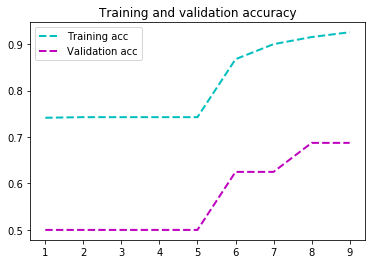

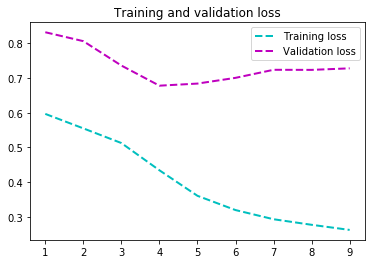

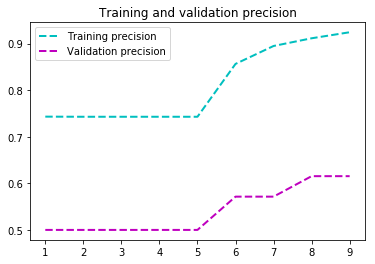

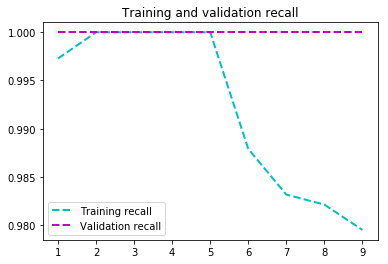

<Figure size 432x288 with 0 Axes>

In [20]:
show_training_plots(history)

Confusion matrices:

In [21]:
import seaborn as sns

def create_cm_plot(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='viridis')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Normal (0)', 'Pneumonia (1)'])
    ax.yaxis.set_ticklabels(['Normal (0)', 'Pneumonia (1)'])
    plt.show()

5216/5216 [==============================] - 3s 500us/step
[[1050  291]
 [  75 3800]]


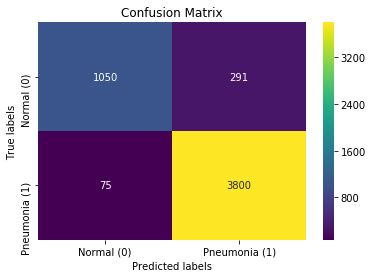

In [22]:
from sklearn.metrics import confusion_matrix

predicted_train_labels = model.predict(train_data,
                                       batch_size=batch_size,
                                       verbose=1)

cm = confusion_matrix(train_labels, predicted_train_labels.round())
print(cm)
create_cm_plot(cm)

16/16 [==============================] - 0s 500us/step
[[3 5]
 [0 8]]


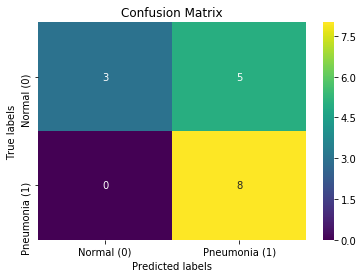

In [23]:
predicted_val_labels = model.predict(val_data,
                                     batch_size=batch_size,
                                     verbose=1)

cm = confusion_matrix(val_labels, predicted_val_labels.round())
print(cm)
create_cm_plot(cm)

Notes:
- This model overfits pretty heavily, and the accuracy on the validation set is pretty poor.
- It looks like the model is overpredicting pneumonia, likely because of the heavy class imbalance

# Data Augmentation

Data augmentation is a popular way to artificially increase the size of your training set by manipulating the training images.  The assumption with augmentation is that the manipulations will result in an image that could realistically be seen in the training data, but is different enough from the original image to force the network to change its activations slightly.

We'll use a fairly basic form of data augmentation here.  Each image will randomly be assigned a slight transformation and a that copy will be added to the dataset in addition to the original.  This effectively doubles our training set.

Because all of the images in this dataset are fairly similar, we'll have to carefully apply augmentation to avoid creating unrealistic images.

Pre-transformation image:

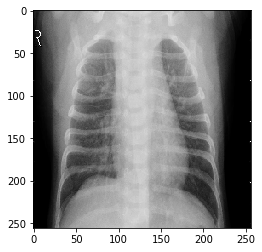

In [24]:
plt.imshow(train_data[0].squeeze(), cmap='gray')

Good transformations:

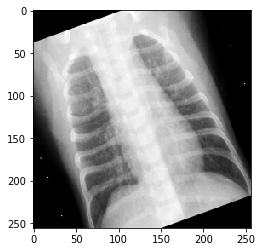

In [26]:
import skimage as sk

# roatation
test_rotate = sk.transform.rotate(train_data[0], 20)
plt.imshow(test_rotate.squeeze(), cmap='gray')

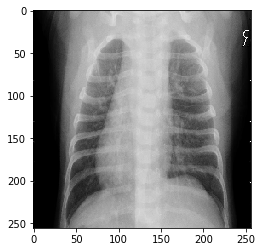

In [27]:
# horizontal flip
plt.imshow(train_data[0][:,::-1].squeeze(), cmap='gray')

Bad transformation:

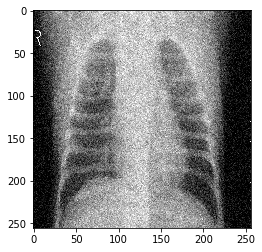

In [28]:
# noise addition
test_noise = sk.util.random_noise(train_data[0])
plt.imshow(test_noise.squeeze(), cmap='gray')

Notes:
- The rotation example looks good, although we'd want to avoid rotating more than 20%
- The horizontal flipping looks good because the torso is symmetrical and pneumonia could show up in either lung
- The random noise addition seems to mask exactly what we are looking for in the image, a clouding of the lungs.  Do not recommend the use of this augmentation technique.

Create transformation functions and dictionary:

In [29]:
import random

def random_rotate(img):
    # randomly selects rotation between -20% and 20%
    random_perc = random.uniform(-20, 20)
    return sk.transform.rotate(img, random_perc)

def horizontal_flip(img):
    # flip on y axis
    return img[:,::-1]

# dictionary of available transformation functions
available_transforms = {
    'rotate': random_rotate,
    'flip': horizontal_flip
}

Generating new versions of each train_data image based on one of the transformations above:

In [30]:
random.seed(55)

train_data_aug = train_data.copy()
train_labels_aug = train_labels.copy()

# augment training data
for i, img in enumerate(train_data_aug):
    key = random.choice(list(available_transforms))
    trans_img = available_transforms[key](img)
    train_data_aug[i] = trans_img

In [31]:
train_data_aug.shape

(5216, 256, 256, 1)

Check results:

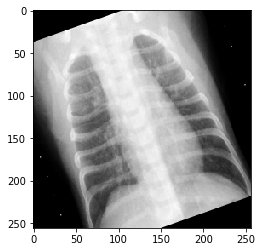

In [32]:
plt.imshow(train_data_aug[0].squeeze(), cmap='gray')

Append original train_data to train_data_aug, then shuffle:

In [33]:
# append
train_data_aug = np.append(train_data_aug, train_data, axis=0)
train_labels_aug = np.append(train_labels_aug, train_labels, axis=0)

# shuffle data
train_data_aug, train_labels_aug = shuffle(train_data_aug, 
                                           train_labels_aug,
                                           random_state=39)

In [34]:
train_data_aug.shape

(10432, 256, 256, 1)

In [35]:
train_labels_aug.shape

(10432, 1)

Next, we'll utilize the same model architecture as before and see how the data augmentation affects training:

### Train Model

In [37]:
K.clear_session()

# model structure
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), 
                        activation='relu', 
                        input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = callbacks.ModelCheckpoint(filepath='augmented_model.h5',
                                       monitor='val_loss',
                                       save_best_only=True)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc', precision_m, recall_m])

batch_size = 16
epochs = 50

history = model.fit(train_data_aug, train_labels_aug,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[early_stop, checkpoint],
                    validation_data=(test_data, test_labels))

Train on 10432 samples, validate on 624 samples
Epoch 1/50
10432/10432 [==============================] - 10s 981us/step - loss: 0.4835 - acc: 0.7547 - precision_m: 0.7531 - recall_m: 0.9968 - val_loss: 0.4920 - val_acc: 0.7340 - val_precision_m: 0.6294 - val_recall_m: 0.6362
Epoch 2/50
10432/10432 [==============================] - 10s 956us/step - loss: 0.3449 - acc: 0.8630 - precision_m: 0.8579 - recall_m: 0.9778 - val_loss: 0.6004 - val_acc: 0.6827 - val_precision_m: 0.6264 - val_recall_m: 0.6394
Epoch 3/50
10432/10432 [==============================] - 10s 930us/step - loss: 0.3054 - acc: 0.8981 - precision_m: 0.9001 - recall_m: 0.9736 - val_loss: 0.5354 - val_acc: 0.7420 - val_precision_m: 0.6272 - val_recall_m: 0.6394
Epoch 4/50
10432/10432 [==============================] - 10s 927us/step - loss: 0.2851 - acc: 0.9123 - precision_m: 0.9155 - recall_m: 0.9725 - val_loss: 0.5225 - val_acc: 0.7692 - val_precision_m: 0.6272 - val_recall_m: 0.6362
Epoch 5/50
10432/10432 [============

### Evaluate Model

Training plots:

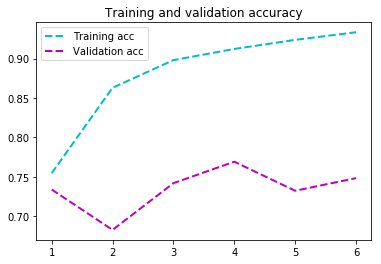

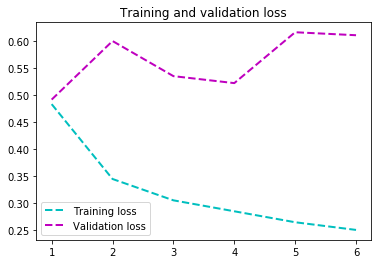

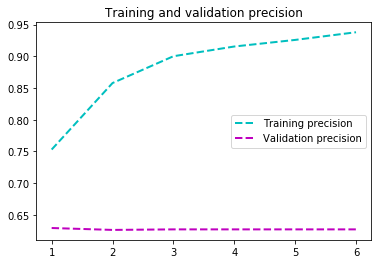

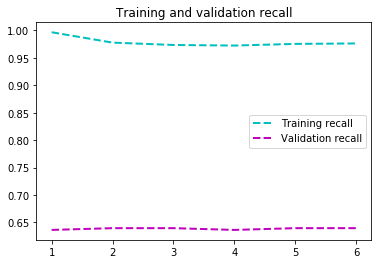

<Figure size 432x288 with 0 Axes>

In [42]:
show_training_plots(history)

Confusion matrices:

10432/10432 [==============================] - 5s 519us/step
[[2034  648]
 [  74 7676]]


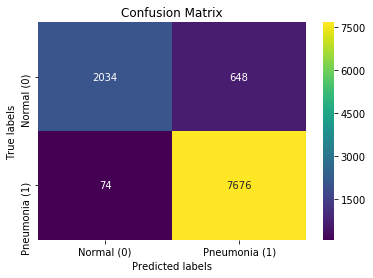

In [43]:
predicted_train_labels = model.predict(train_data_aug,
                                       batch_size=batch_size,
                                       verbose=1)

cm = confusion_matrix(train_labels_aug, predicted_train_labels.round())
print(cm)
create_cm_plot(cm)

16/16 [==============================] - 0s 437us/step
[[2 6]
 [0 8]]


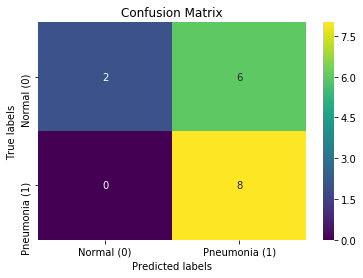

In [44]:
predicted_val_labels = model.predict(val_data,
                                     batch_size=batch_size,
                                     verbose=1)

cm = confusion_matrix(val_labels, predicted_val_labels.round())
print(cm)
create_cm_plot(cm)

Notes:
- The augmentation has slowed the overfitting substantially, but it is still occurring
- The model is still failing to predict normal patients as often as it should

# Model With Class Weights

In heavily-imbalanced datasets, the loss function can be altered to penalize predicting the overrepresented class more than predicting the underrepresented class.  We'll use this through an argument to the model.fit() function in Keras.

### Train Model

In [51]:
K.clear_session()

# model structure
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), 
                        activation='relu', 
                        input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = callbacks.ModelCheckpoint(filepath='class_weight_model.h5',
                                       monitor='val_loss',
                                       save_best_only=True)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc', precision_m, recall_m])

batch_size = 16
epochs = 50

history = model.fit(train_data_aug, train_labels_aug,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[early_stop, checkpoint],
                    validation_data=(test_data, test_labels),
                    class_weight={0:74, 1:26})

Train on 10432 samples, validate on 624 samples
Epoch 1/50
10432/10432 [==============================] - 11s 1ms/step - loss: 22.9661 - acc: 0.5860 - precision_m: 0.9309 - recall_m: 0.4492 - val_loss: 0.5127 - val_acc: 0.8670 - val_precision_m: 0.6410 - val_recall_m: 0.5406
Epoch 2/50
10432/10432 [==============================] - 10s 1ms/step - loss: 14.3130 - acc: 0.8845 - precision_m: 0.9823 - recall_m: 0.8610 - val_loss: 0.3550 - val_acc: 0.8654 - val_precision_m: 0.6368 - val_recall_m: 0.5903
Epoch 3/50
10432/10432 [==============================] - 10s 1ms/step - loss: 10.0006 - acc: 0.9137 - precision_m: 0.9814 - recall_m: 0.9015 - val_loss: 0.3437 - val_acc: 0.8446 - val_precision_m: 0.6346 - val_recall_m: 0.6202
Epoch 4/50
10432/10432 [==============================] - 10s 1ms/step - loss: 8.0630 - acc: 0.9235 - precision_m: 0.9801 - recall_m: 0.9170 - val_loss: 0.3066 - val_acc: 0.8654 - val_precision_m: 0.6337 - val_recall_m: 0.6095
Epoch 5/50
10432/10432 [=================

### Evaluate Model

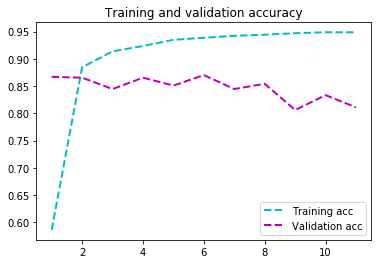

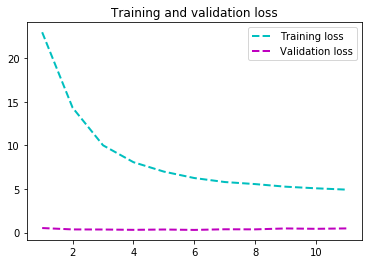

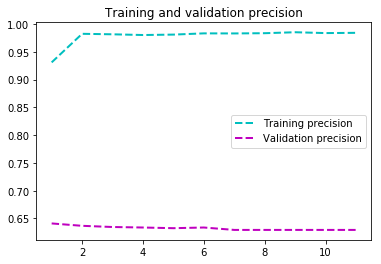

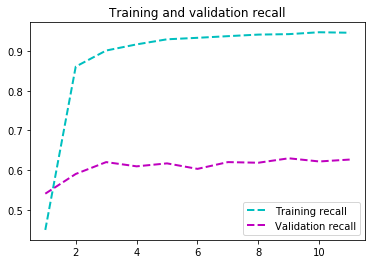

<Figure size 432x288 with 0 Axes>

In [52]:
show_training_plots(history)

10432/10432 [==============================] - 6s 534us/step
[[2585   97]
 [ 376 7374]]


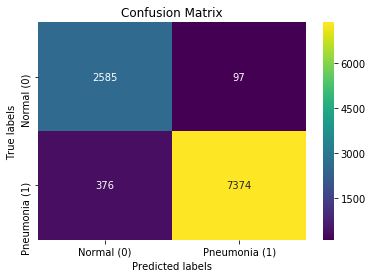

In [53]:
predicted_train_labels = model.predict(train_data_aug,
                                       batch_size=batch_size,
                                       verbose=1)

cm = confusion_matrix(train_labels_aug, predicted_train_labels.round())
print(cm)
create_cm_plot(cm)

16/16 [==============================] - 0s 500us/step
[[6 2]
 [0 8]]


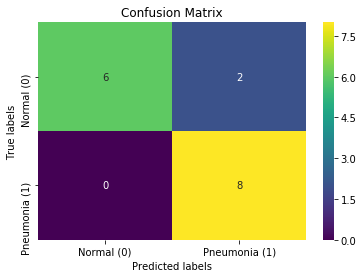

In [54]:
predicted_val_labels = model.predict(val_data,
                                     batch_size=batch_size,
                                     verbose=1)

cm = confusion_matrix(val_labels, predicted_val_labels.round())
print(cm)
create_cm_plot(cm)

Notes:
- With the addition of augmentation and class weights, the model is fitting much better now

# Interpreting the Model

In this section we'll attempt to evaluate what the convnet has learned.  We'll do this through visualizing intermediate activations given a test image.  Because there are only two convolutional layers in our network, we should be able to look at each channel easily.

Sample image:

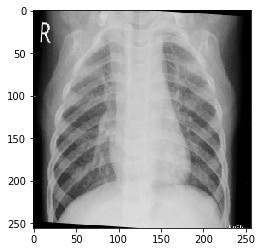

In [69]:
sample_img = train_data_aug[0]
plt.imshow(sample_img.squeeze(), cmap='gray')

Sample image prediction from our model:

In [70]:
sample_img = np.expand_dims(sample_img, axis=0)
sample_prediction = model.predict(sample_img).round()
print('Prediction = ', sample_prediction[0][0])

Prediction =  1.0


Actual value:

In [72]:
print('True value = ', train_labels_aug[0][0])

True value =  1


Creating activations:

In [73]:
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(sample_img)

Looking at the first layer activations:

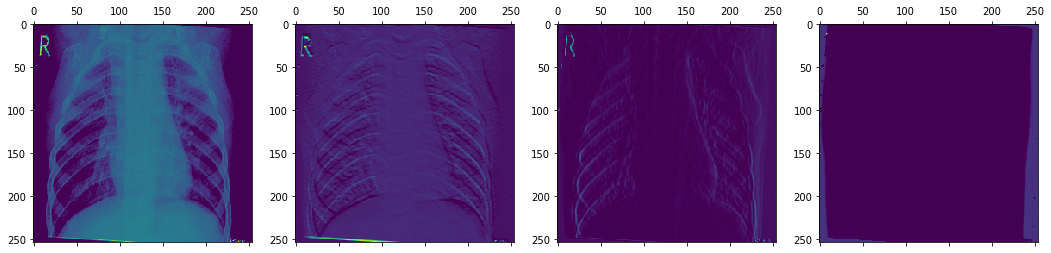

In [75]:
fig = plt.figure(figsize=(18, 16))

for i in range(4):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.matshow(activations[0][0, :, :, i])

Looking at the third layer activations:

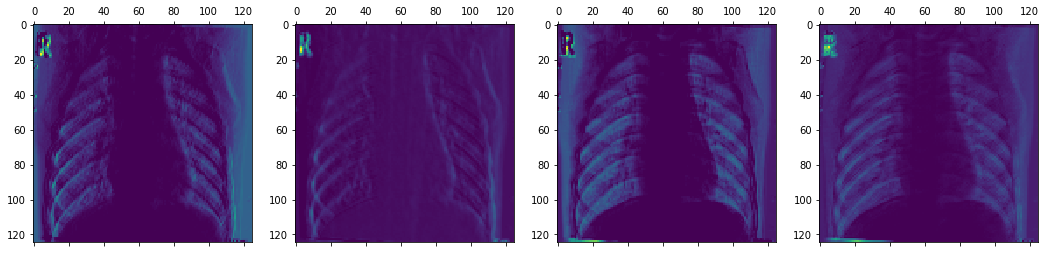

In [76]:
fig = plt.figure(figsize=(18, 16))

for i in range(4):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.matshow(activations[2][0, :, :, i])

Notes:
- The first layer looks like it is mostly grabbing edges, which effectively recreates the image because it is grayscale
- The second layer is much more interesting.  It appears to be looking in-between the ribcage at the lung.  This is exactly where it would need to look for signs of pneumonia.

# Evaluating Final Model on Test Data

Now that we have a model that is performing well and is interpretable, we will use it to predict the reserved test data.  These predictions will be compared to their true value to determine the model's effectiveness.

624/624 [==============================] - 0s 586us/step
[[125 109]
 [  9 381]]


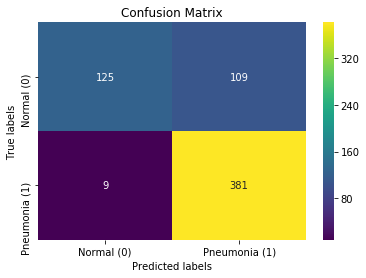

In [77]:
predicted_test_labels = model.predict(test_data,
                                      batch_size=batch_size,
                                      verbose=1)

cm = confusion_matrix(test_labels, predicted_test_labels.round())
print(cm)
create_cm_plot(cm)

In [80]:
print('Model Accuracy = ', (381 + 125) / 624)
print('Model Precision = ', 381 / (381 + 109))
print('Model Recall = ', 381 / (381 + 9))

Model Accuracy =  0.8108974358974359
Model Precision =  0.7775510204081633
Model Recall =  0.9769230769230769


Notes:
- While the accuracy and precision are decent, the real win here is the high recall value.  Because this model would be used to assist in diagnoses, a high rate of false negatives could lead to patients failing to get treatment when needed.  It is much better to have false positives in this case, as the presence of pneumonia could be ruled out through other means.